In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [3]:
# load the data
X, y = load_breast_cancer(return_X_y=True)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

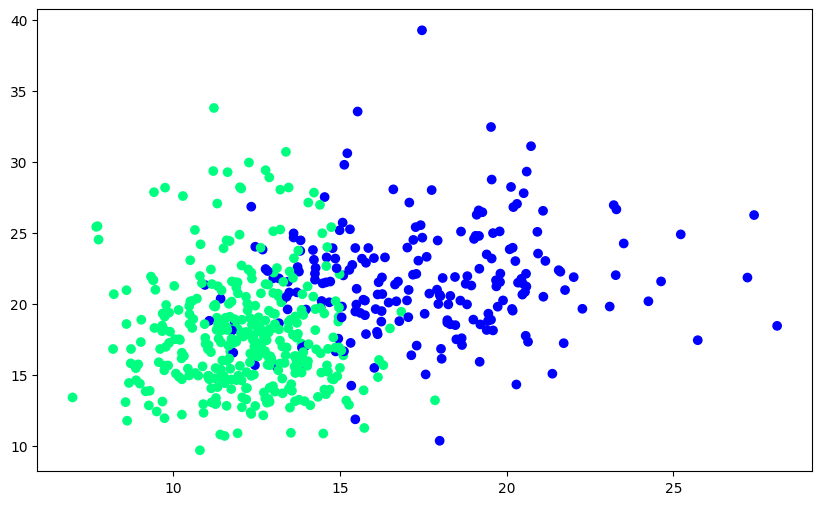

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter")
plt.show()

In [7]:
def sigmoid(z):

    return 1 / (1 + np.exp(-z))

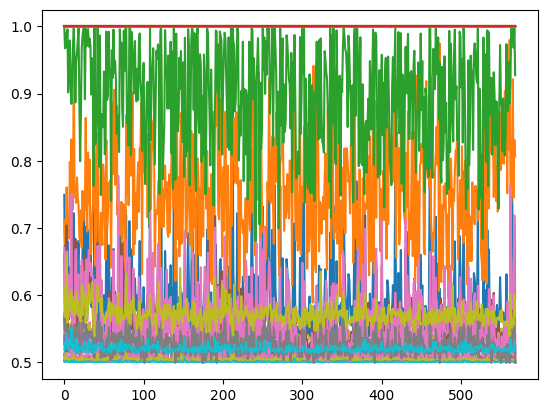

In [16]:
plt.plot(sigmoid(X))

In [8]:
class perceptron():

    def __init__(self, epochs, lr):

        self.coef_ = None
        self.intercept_ = None
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train,  0, 1, axis=1)

        weights = np.ones(X_train.shape[1])

        for i in range(self.epochs):

            j = np.random.randint(X_train.shape[0])

            y_hat = sigmoid(np.dot(X_train[j], weights))

            weights = weights - np.dot(self.lr, ((y_train[j] - y_hat))) * X_train[j]
    
        self.coef_ = weights[1:]
        self.intercept_ = weights[0]

        print(f"Coef_:{self.coef_}, Intercept_: {self.intercept_}")
    
    def predict(self, X_test):

        y_pred = sigmoid(np.dot(X_test, self.coef_))
        return y_pred
    

In [9]:
percp = perceptron(epochs=1000, lr=0.01)


In [10]:
percp.fit(X_train, y_train)

Coef_:[6.55413000e+01 7.94064000e+01 4.26948700e+02 3.59755000e+03
 1.38026020e+00 1.52896210e+00 1.58810520e+00 1.32061980e+00
 1.71604600e+00 1.23177760e+00 3.15074700e+00 5.44699800e+00
 1.63206000e+01 2.53514600e+02 1.02436863e+00 1.11702015e+00
 1.15210220e+00 1.05472040e+00 1.07514171e+00 1.01446452e+00
 7.90403000e+01 1.08650100e+02 5.22832600e+02 5.21612500e+03
 1.53530920e+00 2.37679800e+00 2.67555760e+00 1.67340910e+00
 2.21559400e+00 1.33705610e+00], Intercept_: 4.709999999999943


In [11]:
y_pred = percp.predict(X_test)

In [12]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
from sklearn.metrics import accuracy_score
ac_c = accuracy_score(y_test, y_pred)

ac_c

0.6228070175438597

In [14]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(X_train, y_train)

y_pred_sk = lg.predict(X_test)

/home/inventor/Machine_learning/machinelearning/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
ac_sk = accuracy_score(y_test, y_pred_sk)

ac_sk

0.9649122807017544